#### Objectives

Project the s-state components on the Harmonic Oscilator basis and analyze the results.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../Functions")
from GS_waves import select_freq_range
from abtem.waves import PlaneWave
from Column_matching import (
    inv_Bessel,
    Bessel_transform,
    HO_transform
    )
from abtem import Potential
from Defocus_circle import generate_continious_phase
import Generate_structure
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from circle_fit import least_squares_circle
from Complex_Gaussian import (
    Gaussian_fitting,
    Gaussian_in_focus,
    Gaussian_function,
    Modified_Gaussian_fitting,
    Gaussian_function_partition
)

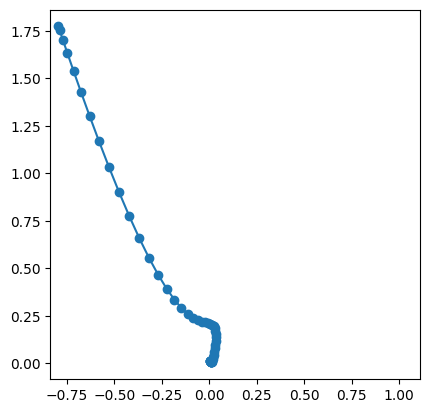

In [6]:
#Parameters to set
gmin = 0; gmax = 2; sampling = 0.0656015; energy = 300e3
a = 4.05; length = 50
#Results from isolated column
thickness = 10
n_repeat = 2
structure = Generate_structure.generate_periodic_fcc("Al", a, n_repeat, n_repeat, thickness)
exitwave = select_freq_range(np.array(PlaneWave(sampling=sampling, energy=energy).multislice(structure).array),
                        gmin, gmax, sampling)
m, n = exitwave.shape
exitwave = exitwave[(n_repeat*2-1)*m//(n_repeat*4):(n_repeat*2+1)*m//(n_repeat*4),
                    (n_repeat*2-1)*n//(n_repeat*4):(n_repeat*2+1)*n//(n_repeat*4)]
krange = np.linspace(gmin+0.01, gmax, length)
results, components = Bessel_transform(exitwave-1, sampling, gmin+0.01, gmax, length, x0=sampling/2, y0=sampling/2)
plt.plot(np.real(results), np.imag(results))
plt.scatter(np.real(results), np.imag(results))
plt.axis("square")
plt.show()

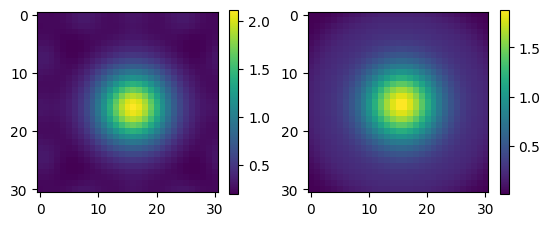

In [11]:
plt.subplot(1, 2, 1)
plt.imshow(np.abs(exitwave-1))
plt.colorbar(shrink=0.5)
plt.subplot(1, 2, 2)
plt.imshow(np.abs(components))
plt.colorbar(shrink=0.5)
plt.show()

In [7]:
fitted = np.array(list(Gaussian_fitting(results,krange,[0.01, 1]).best_values.values()))
print(fitted)

[-0.80007219  1.58866939  5.17541104 -1.08542771  0.01464193  0.19474131]


Check for HO basis

In [4]:
from scipy.special import factorial, hermite
param = 0.5
n = 1
krange = np.linspace(-gmax, gmax, length)
k_sampling = krange[1] - krange[0]
poly1 = np.exp(-(krange/param)**2/2)\
            /np.sqrt(2**n*factorial(n)*np.sqrt(np.pi)*param)\
            *hermite(n)(krange/param)
n = 1
poly2 = np.exp(-(krange/param)**2/2)\
            /np.sqrt(2**n*factorial(n)*np.sqrt(np.pi)*param)\
            *hermite(n)(krange/param)
print(np.sum(poly1 * poly2)*k_sampling)

0.9999997421283402


In [21]:
param = np.sqrt(1/(fitted[2]*2))
Basis, Proj = HO_transform(results, krange, param, n_basis=1)

In [22]:
print(Basis)

[-0.80436033+0.84865046j]


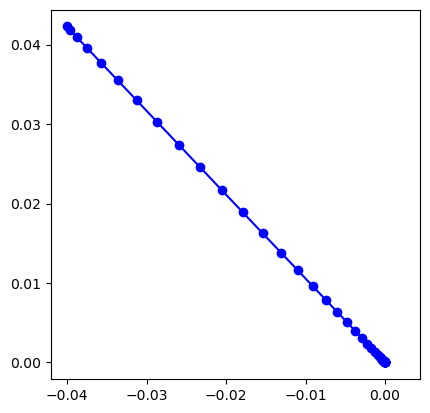

In [23]:
#plt.plot(np.real(components), np.imag(components), color='r')
#plt.scatter(np.real(components), np.imag(components), color='r')
plt.plot(np.real(Proj), np.imag(Proj), color='b')
plt.scatter(np.real(Proj), np.imag(Proj), color='b')
plt.axis("square")
plt.show()